In [6]:
library(kknn)

Warning message:
"package 'kknn' was built under R version 3.6.3"

# Task 1

* For the first task we are asked to perform k-NN on accelerometer data.
* First, I read the data, updated column names and concateneted axes.

In [1]:
x_train = read.table("uWaveGestureLibrary_X_TRAIN")
y_train = read.table("uWaveGestureLibrary_Y_TRAIN")
z_train = read.table("uWaveGestureLibrary_Z_TRAIN")

x_test = read.table("uWaveGestureLibrary_X_TEST")
y_test = read.table("uWaveGestureLibrary_Y_TEST")
z_test = read.table("uWaveGestureLibrary_Z_TEST")

In [2]:
cols <- {"class"}
for (i in 1:315){cols <- c(cols, paste0("X_", i))}
colnames(x_train) <- cols

y_train = y_train[-1]
cols = {}
for (i in 1:315){cols <- c(cols, paste0("Y_", i))}
colnames(y_train) <- cols

z_train = z_train[-1]
cols = {}
for (i in 1:315){cols <- c(cols, paste0("Z_", i))}
colnames(z_train) <- cols

train <- cbind(x_train, y_train, z_train)

In [3]:
cols <- {"class"}
for (i in 1:315){cols <- c(cols, paste0("X_", i))}
colnames(x_test) <- cols


y_test = y_test[-1]
cols = {}
for (i in 1:315){cols <- c(cols, paste0("Y_", i))}
colnames(y_test) <- cols

z_test = z_test[-1]
cols = {}
for (i in 1:315){cols <- c(cols, paste0("Z_", i))}
colnames(z_test) <- cols

test <- cbind(x_test, y_test, z_test)

In [4]:
train$class = as.factor(train$class)
test$class = as.factor(test$class)

# A

* For section A, the aim is to find the bes k value for k-NN using test data.
* It is asked to apply 10 fold cross validation, for that, fold column is added which randomly splits the data into 10 split with nearly the same size
* we are asked to use 2 distance measures, I could not think of anything better than manhattan end euclidean, unfortunately.

In [7]:
train$fold <- sample(factor(rep(1:10, length.out=nrow(train)), labels=paste0("Fold", 1:10)))

* train data is splitted as test and train using fold column, 10 times. Misclassification error is calculated for each fold. Average of all folds are calculated to get misclassification error for one k value.
* Misclassification error is calculated as above for k from 1 to 20.

In [78]:
misclass_ratio_euc = {}
for (neighbor in 1:20){
misclass_ratio_k = {}
for(fold in 1:10){
fld = paste0("Fold", fold)
trn = train[train$fold==fld,][,-ncol(train)]
tst = train[train$fold!=fld,][,-ncol(train)]
fit = kknn(formula = class~., trn, tst, k = neighbor, distance = 2)
misclass_ratio_k = c(misclass_ratio_k, 1 - sum(fit$fitted.values==tst$class)/length(tst$class))
}
misclass_ratio_euc = c(misclass_ratio_euc, mean(misclass_ratio_k))
}

In [79]:
misclass_ratio_euc

[1] 0.1316946 0.1316946 0.1316946 0.1316946 0.1316946 0.1308260 0.1305778
 [8] 0.1308250 0.1323122 0.1342967 0.1350399 0.1355354 0.1375199 0.1387601
[15] 0.1413636 0.1434717 0.1459523 0.1481839 0.1502916 0.1528954

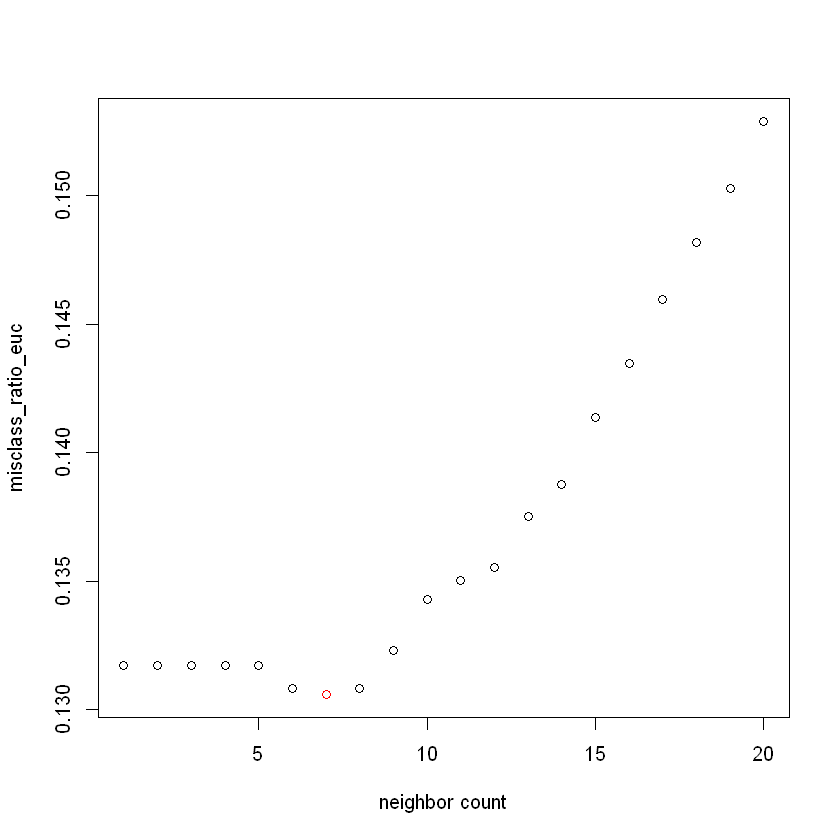

In [80]:
x_axis = 1:20
plot(x_axis, misclass_ratio_euc, xlab="neighbor count", col=ifelse(x_axis==7, "red", "black"))

* Here, k=7 gives the best result.
* As k gets higher, misclassification increases, i.e. overfits.

* Next the same is applied for manhattan distance.

In [81]:
misclass_ratio_man = {}
for (neighbor in 1:20){
misclass_ratio_k = {}
for(fold in 1:10){
fld = paste0("Fold", fold)
trn = train[train$fold==fld,][,-ncol(train)]
tst = train[train$fold!=fld,][,-ncol(train)]
fit = kknn(formula = class~., trn, tst, k = neighbor, distance = 1)
misclass_ratio_k = c(misclass_ratio_k, 1 - sum(fit$fitted.values==tst$class)/length(tst$class))
}
misclass_ratio_man = c(misclass_ratio_man, mean(misclass_ratio_k))
}

In [82]:
misclass_ratio_man

[1] 0.1165666 0.1165666 0.1165666 0.1165666 0.1165666 0.1143330 0.1150768
 [8] 0.1151997 0.1175556 0.1194153 0.1211510 0.1230102 0.1246222 0.1279704
[15] 0.1303263 0.1326821 0.1335504 0.1364023 0.1396266 0.1418588

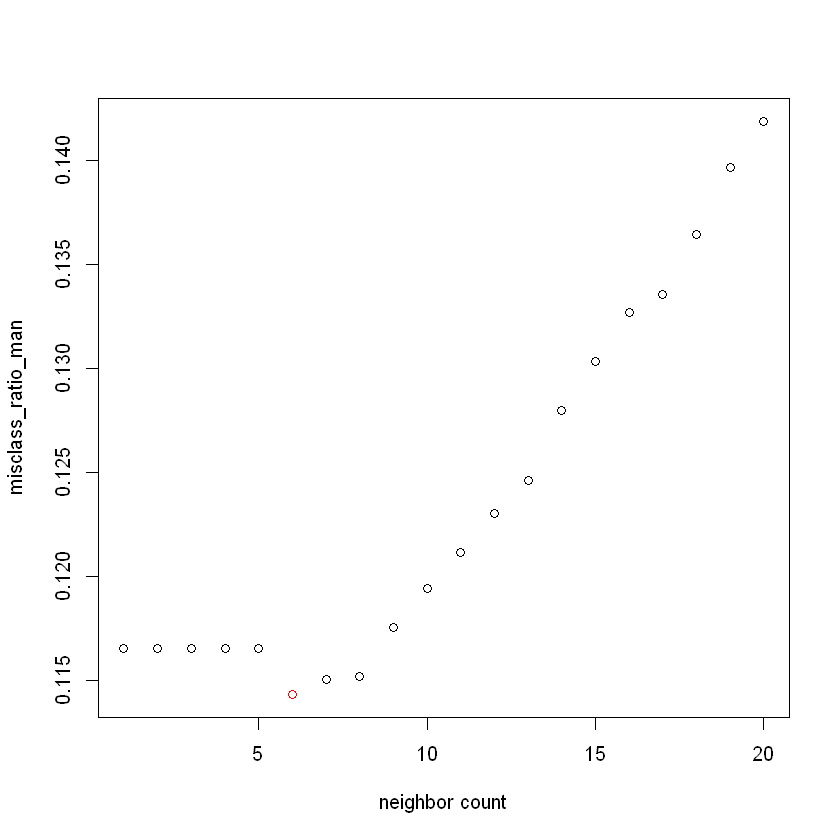

In [83]:
x_axis = 1:20
plot(x_axis, misclass_ratio_man, xlab="neighbor count", col=ifelse(x_axis==6, "red", "black"))

* For manhattan distance, k=6 is the best.

# B 

* For section B, we are asked to use k values obtained in section A to use k-NN on test data.
* First, remove fold column.

In [86]:
train = train[,-ncol(train)] 

In [88]:
start.time <- Sys.time()
fit_euc = kknn(formula = class~., train, test, k = 7, distance = 2)
end.time <- Sys.time()
time.taken <- end.time - start.time
time.taken

Time difference of 8.945514 secs

* Confusion matrix

In [90]:
table(fit_euc$fitted.values, test$class)

   
      1   2   3   4   5   6   7   8
  1 430   1   2   6   3   4   0   0
  2   0 449   0   0   0   0   0   0
  3   0   0 416   0   8   4   3   0
  4   2   0   0 371   1  14   0   2
  5   0   0  16  58 419  28   0   1
  6   4   0  15   7   2 399   0   0
  7   1   2   5   0   0   0 444   0
  8   0   0   0   8   0   0   0 457

* Misclassification ratio

In [92]:
1 - sum(fit_euc$fitted.values==test$class)/length(test$class)

[1] 0.05499721

In [89]:
start.time <- Sys.time()
fit_man = kknn(formula = class~., train, test, k = 6, distance = 1)
end.time <- Sys.time()
time.taken <- end.time - start.time
time.taken

Time difference of 52.79486 secs

* Confusion matrix

In [91]:
table(fit_man$fitted.values, test$class)

   
      1   2   3   4   5   6   7   8
  1 432   1   2   3   3   4   0   0
  2   0 451   0   0   0   0   0   0
  3   0   0 418   0   7   4   3   0
  4   2   0   0 387   1  13   0   2
  5   0   0  14  47 421  24   0   1
  6   3   0  15   7   1 404   0   0
  7   0   0   5   0   0   0 444   0
  8   0   0   0   6   0   0   0 457

* Misclassification ratio

In [93]:
1 - sum(fit_man$fitted.values==test$class)/length(test$class)

[1] 0.04690117

* We see that both models are providing promising results, but we cannot confirm the models are good before knowing that if approximately %5 error is acceptable.
* Version with manhattan distance seems slightly better since it has lower misclassification.
* Both manhattan and euclidean versions are misclassifying at similar locations looking at confusion matrix: (5, 3) (6, 3) (5, 4), etc..

# C

* For this section, we are asked to evaluate what could be different if we were to weight different axes differently.
* Some of the gestures may be more dependent on movement/acceleraton on one or two axes where the other axis/axes are providing only noise or little information about the gesture. For these gestures, weighting might work better to identify the true class. However, weighting must be made carefully, if one gives the more wieght to the axis whic provides mostly noise, train error might drop where test error increases drastically. One other possible outcome is that one gesture might be identified better or more frequently, accuracy on other gesture classes might get worse.

# Task 2

* In the second task, we are asked to perform regression on accelerometer data.
* we are asked to predict if a gesture is of class 3 or not

In [142]:
require(glmnet)

Loading required package: glmnet
Loading required package: Matrix
Loading required package: foreach
Loaded glmnet 2.0-16



In [127]:
c3_train = train
c3_test = test
c3_train$c3 = as.numeric(train$class == 3)
c3_test$c3 = as.numeric(c3_test$class == 3)

# A

* In the section we will to perform logistic regression on the train data.
* We will use portion of the data from class 3 to get the threshold.

In [128]:
thres = 1 - sum(c3_train$c3)/nrow(c3_train)

* I was not able to use all features, I only managed to use around 150 features. I picked last 146 feature for loglinear regression.

In [282]:
log_reg=glm(c3~.,c3_train[,800:947],family=binomial)

In [283]:
summary(log_reg)


Call:
glm(formula = c3 ~ ., family = binomial, data = c3_train[, 800:947])

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.0180  -0.4053  -0.1441  -0.0489   3.3794  

Coefficients:
             Estimate Std. Error z value Pr(>|z|)    
(Intercept)   -3.9206     0.3418 -11.471  < 2e-16 ***
Z_169         31.5772    12.2267   2.583 0.009805 ** 
Z_170        -74.3782    27.7449  -2.681 0.007345 ** 
Z_171         65.7679    28.8352   2.281 0.022559 *  
Z_172        -40.8106    36.2723  -1.125 0.260540    
Z_173         53.8823    38.6290   1.395 0.163056    
Z_174        -74.9885    37.6254  -1.993 0.046258 *  
Z_175         36.1477    31.8219   1.136 0.255983    
Z_176         20.9807    30.8631   0.680 0.496632    
Z_177        -19.6615    33.7056  -0.583 0.559671    
Z_178         -5.7221    37.0964  -0.154 0.877413    
Z_179         18.1323    33.3763   0.543 0.586943    
Z_180        -25.0701    28.5729  -0.877 0.380266    
Z_181         46.7330    29.4439   1.58

* Summary seems quite complex, it is hard to get an insight from the result of that model.

In [284]:
predicted=predict(log_reg,c3_test[,-1],type='response')

In [285]:
table(as.numeric(predicted >= thres), c3_test$c3)

   
       0    1
  0 3014  402
  1  114   52

* Although model predicts 0s correctly, it fails to detect 1s. This is basically because it flags most data as 0. That might be caused from that I could not introduced all features to the model.  

# B

* In Section B, we perform logistic regression with lasso peanties and 10 fold cross validation.
* Our response is binomial, measure type is given "deviance" as instructed.

In [248]:
x_matrix=as.matrix(c3_train[,2:946])
cvfit=cv.glmnet(x = x_matrix, y = c3_train$c3, nfolds=10, type.measure = c("deviance"), family="binomial")

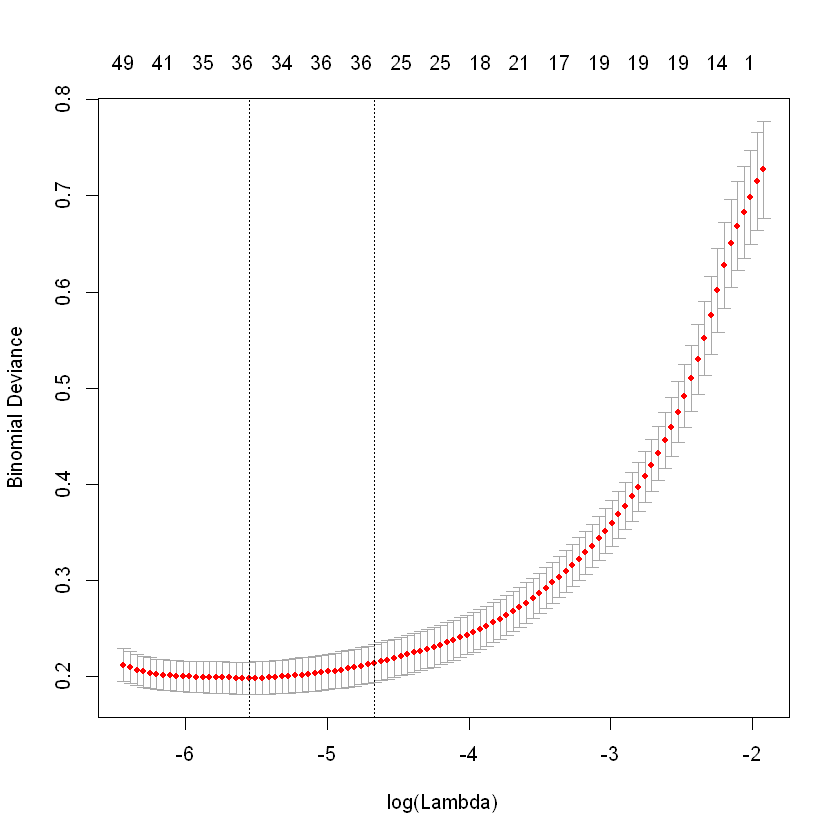

In [305]:
plot(cvfit)

* To get a simple model, I picked 1se the lambda is as below:

In [286]:
cvfit$lambda.1se

[1] 0.009413261

In [325]:
coef(cvfit,s="lambda.1se")

946 x 1 sparse Matrix of class "dgCMatrix"
                        1
(Intercept) -3.877268e+00
X_1          .           
X_2          .           
X_3          .           
X_4          .           
X_5          .           
X_6          .           
X_7          .           
X_8          .           
X_9          .           
X_10         .           
X_11         .           
X_12         .           
X_13         .           
X_14         .           
X_15         .           
X_16         .           
X_17        -7.391486e-05
X_18         .           
X_19        -7.358307e-02
X_20         .           
X_21         .           
X_22         .           
X_23         .           
X_24         .           
X_25         .           
X_26         .           
X_27         .           
X_28         .           
X_29         .           
X_30         .           
X_31         .           
X_32         .           
X_33         .           
X_34         .           
X_35         .       

* Scrolling down, I realized that more features from X axis are considered important.

In [323]:
test_matrix = as.matrix(c3_test[,2:946])
predicted_lasso=predict(cvfit,test_matrix,s='lambda.1se',type='class')

In [324]:
table(predicted_lasso, c3_test$c3)

               
predicted_lasso    0    1
              0 3046  125
              1   82  329

* We can see that the resulst are improved, especially for 1 values, which we aimed to predict at the first place.

# C

* For this section we will use multidimensional scaling and use distance matric to train and predict class value.
* Simply calculate distance matrix for points in train.

In [258]:
distance_train = as.matrix(dist(x_matrix, method = "euclidean"))

In [259]:
distance_train

1,2,3,4,5,6,7,8,9,10,...,887,888,889,890,891,892,893,894,895,896
0.00000,51.30385,46.49263,50.00557,40.53065,48.77339,49.78434,34.47481,38.36707,30.47860,...,46.01287,39.73031,41.26587,37.26560,52.64993,34.61732,40.36802,43.59052,47.17981,52.29014
51.30385,0.00000,26.15062,36.84757,32.71092,37.63036,38.19377,50.04145,37.77742,57.60482,...,46.03559,49.01368,32.31978,49.04021,34.11599,44.40307,54.65286,41.24253,43.26349,24.41367
46.49263,26.15062,0.00000,43.11491,34.68557,34.77018,52.90127,45.07319,39.31871,54.02186,...,49.77938,43.33303,34.88315,48.61401,36.60350,37.87980,49.85753,47.86957,52.75303,23.00783
50.00557,36.84757,43.11491,0.00000,45.09594,41.03078,39.72564,55.62494,49.68671,44.87356,...,41.21545,38.46376,47.07113,44.03824,33.65578,43.62841,45.17318,36.47610,37.77271,37.73935
40.53065,32.71092,34.68557,45.09594,0.00000,36.55246,44.96919,34.49307,20.71561,48.63792,...,47.36377,53.91140,17.27920,36.79339,49.61586,44.74386,44.68900,45.79881,44.43520,39.75526
48.77339,37.63036,34.77018,41.03078,36.55246,0.00000,48.51623,48.43767,42.56081,51.06056,...,48.74836,52.96310,37.81844,42.26116,40.39066,46.14251,39.92165,43.24382,47.93611,32.42908
49.78434,38.19377,52.90127,39.72564,44.96919,48.51623,0.00000,45.90198,42.97855,48.05085,...,34.15286,47.25618,42.94309,45.29345,40.17219,47.09746,45.96139,35.88297,20.08501,46.21534
34.47481,50.04145,45.07319,55.62494,34.49307,48.43767,45.90198,0.00000,28.07811,38.60090,...,44.66002,46.27074,33.39059,35.33349,53.65389,43.44167,35.63674,49.61294,43.18072,50.14744
38.36707,37.77742,39.31871,49.68671,20.71561,42.56081,42.97855,28.07811,0.00000,46.85460,...,47.32454,53.22690,20.35552,38.10433,50.29494,46.42019,41.44044,46.89570,44.03369,42.83971
30.47860,57.60482,54.02186,44.87356,48.63792,51.06056,48.05085,38.60090,46.85460,0.00000,...,42.91202,34.47536,49.30920,33.57471,49.71229,39.16273,36.50583,44.62821,42.90460,55.66014


* Train as in Section B.

In [260]:
cvfit_distance=cv.glmnet(x = distance_train, y = c3_train$c3, nfolds=10, type.measure = c("deviance"), family="binomial")

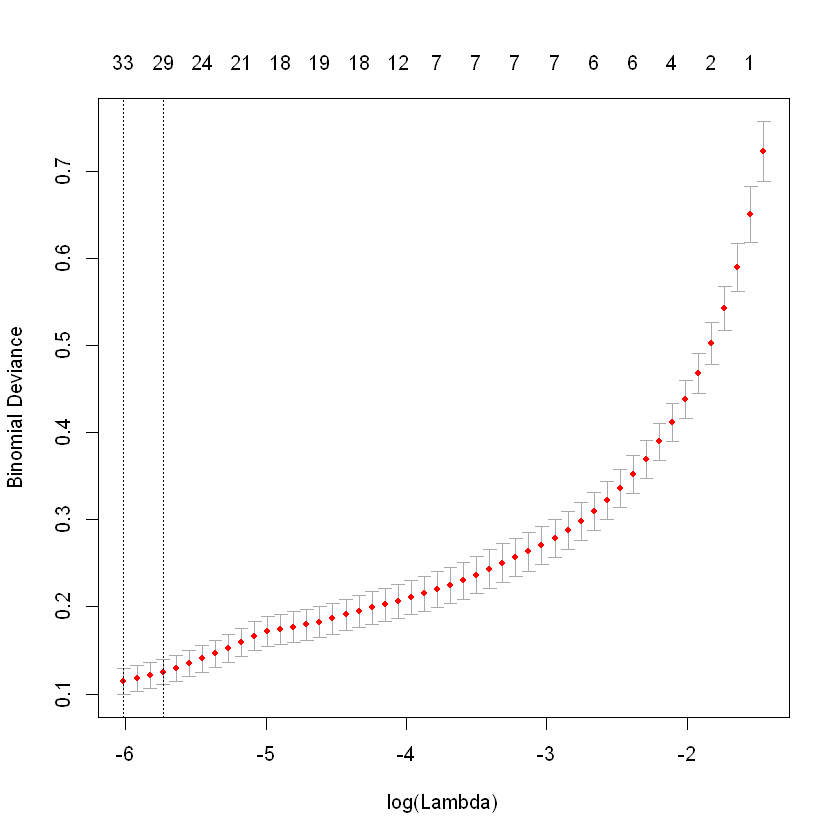

In [261]:
plot(cvfit_distance)

In [262]:
coef(cvfit_distance,s="lambda.1se")

897 x 1 sparse Matrix of class "dgCMatrix"
                        1
(Intercept)  4.018841e+01
1            .           
2            .           
3            .           
4           -3.372788e-02
5            .           
6            .           
7            .           
8            .           
9            .           
10           .           
11           .           
12           .           
13           .           
14           .           
15           .           
16           .           
17           .           
18           .           
19           .           
20           .           
21           .           
22           .           
23           .           
24           .           
25           .           
26           .           
27           .           
28           .           
29           .           
30           .           
31           .           
32           .           
33           .           
34           .           
35           .       

* We see that distance from some selected points are considered important while predicting class 3. I do not see an accumulation around a couple of points.
* I think these instances are either of class 3 or have completely different values than 3, so that they help model distinguish.
* If one point is close to a point of class 3, the point will probably flagged as 1.
* Tf one point is close to a point that is from another class, the point will be predicted as 0.

In [333]:
train[732,]

,class,X_1,X_2,X_3,X_4,X_5,X_6,X_7,X_8,X_9,...,Z_307,Z_308,Z_309,Z_310,Z_311,Z_312,Z_313,Z_314,Z_315,c3
732,3,0.2139647,0.2139647,0.2139647,0.2139647,0.2139647,0.2139647,0.2139647,0.2139647,0.2139647,...,-0.9228955,-0.9228955,-0.9228955,-0.9228955,-0.9228955,-0.9228955,-0.9228955,-0.9228955,-0.9228955,1


In [279]:
all_pts = rbind(test_matrix, x_matrix)

* To calculate distance from train points to test points, first calculate distance from all points to all points.

In [280]:
distance_test = as.matrix(dist(all_pts, method = "euclidean"))

In [295]:
nrow(test)

[1] 3582

* Then get rows corresponding to test data and columns corresponding to train data.

In [334]:
final_distance_test = distance_test[1:3582 ,3583:4478]

In [335]:
nrow(final_distance_test)

[1] 3582

In [336]:
predicted_lasso_distance = predict(cvfit_distance,final_distance_test,s='lambda.1se',type='class')

In [337]:
table(predicted_lasso_distance, c3_test$c3)

                        
predicted_lasso_distance    0    1
                       0 3096   78
                       1   32  376

* We see that error is reduced from the previous version. 

# D

* Logistic Regression Misclassification Error

In [338]:
sum(as.numeric(predicted >= thres)!=c3_test$c3)/nrow(c3_test)

[1] 0.1440536

* Lasso Penalized Logistic Regression Misclassification Error

In [339]:
sum(predicted_lasso!=c3_test$c3)/nrow(c3_test)

[1] 0.05778894

* Lasso Penalized Logistic Regression with Multidimensional Scaling Misclassification Error 

In [340]:
sum(predicted_lasso_distance!=c3_test$c3)/nrow(c3_test)

[1] 0.0307091

* We see that, in each step we improved the model. So, the best model is Lasso Penalized Logistic Regression with Multidimensional Scaling. 